In [133]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("mnist")
trained_dataset=dataset["train"]

data_array=[[] for i in range (10)]

In [134]:
for data in trained_dataset:
    data_image = data["image"]
    data_label = data["label"]
    if len(data_array[data_label])<100 :
        data_array[data_label].append(np.array(data_image).flatten())  #adds 100 images from each class 0 to 9 of mnist trained data set to data_array

In [135]:
data_nparray =np.array(data_array)   # converts the data_array(which is list of lists) into numpy array
X =np.zeros((1000,784))              # creates a 2D numpy array X  with 1000 rows and 784 couloumns intailised to 0
for i in range(10) :
  for j in range(100) :
     X[100*i+j] =data_nparray[i,j]    
                                      #each row  becomes a datapoint(corresponds an image) of  X.(X is a 1000 X 784 matrix)
X = X.transpose()  # each coloumn of X is a datapoint.(X is a 784 X 1000 matrix))           
N = X.shape[1]  

# POLYNOMIAL KERNEL

13.58498614239146
11.751975416127728
10.861879091280171


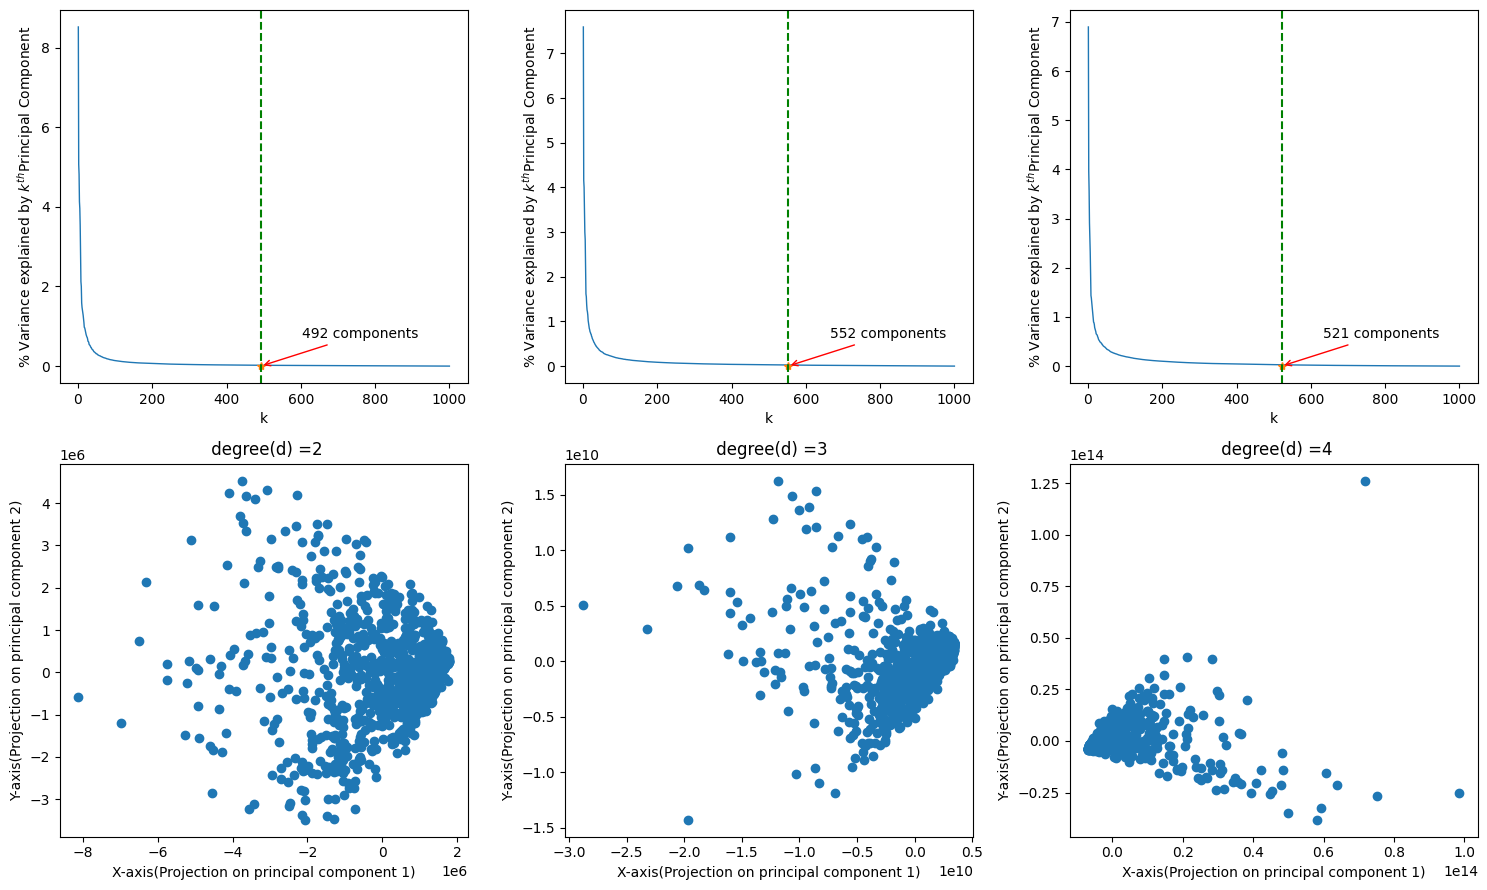

In [136]:
degrees = [2,3,4]
fig,axs=plt.subplots(2,3,figsize=(15,9))
a=0
for degree in degrees :
    
    

    P_Kernel_matrix=np.zeros((N,N))
    P_Kernel_matrix=(1+np.matmul(X.T,X))**degree
    sum_of_elements_row=np.sum(P_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(P_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(P_Kernel_matrix)/((N)*(N))
    Centered_P_Kernel_matrix=np.zeros((N,N))
    Centered_P_Kernel_matrix=P_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    P_Kernel_eigenvalues,P_Kernel_eigenvectors=np.linalg.eigh(Centered_P_Kernel_matrix)
    P_Kernel_eigenvalues=P_Kernel_eigenvalues[::-1]
    P_Kernel_eigenvectors=P_Kernel_eigenvectors[:,::-1]

    eigenvalues_totalsum =0 #intialised to zero
    K=0                     
    eigen_sum=[0   for i in range(N)]  # creates list of length 784 each element is 0.
    for i in range (len(P_Kernel_eigenvalues) ):
        eigenvalues_totalsum+=P_Kernel_eigenvalues[i]
                                                 
    for j in range (len(P_Kernel_eigenvalues) ):
        for k in range(j) :
            eigen_sum[j]+=P_Kernel_eigenvalues[k]
        eigen_sum[j] = eigen_sum[j]*100/ (eigenvalues_totalsum)
    
    for i in range(len(P_Kernel_eigenvalues)) :
        if eigen_sum[i]>=95 :
            K=i
            break   
    print(eigen_sum[2])
    # print(K)
    Alphas = np.zeros((N,2))
    for i in range(2) :
        Alphas[:,i]=P_Kernel_eigenvectors[:,i]/(np.sqrt(P_Kernel_eigenvalues[i]))


    after_P_kernel_data=np.zeros((X.shape[1],2))
    for i in range(X.shape[1]) :
        after_P_kernel_data[i,0]=np.dot(Centered_P_Kernel_matrix[i].T,Alphas[:,0])
        after_P_kernel_data[i,1]=np.dot(Centered_P_Kernel_matrix[i].T,Alphas[:,1])
    x= np.arange(1,len(P_Kernel_eigenvalues)+1)


    axs[int(a/3),int(a%3)].plot(x,100*P_Kernel_eigenvalues/eigenvalues_totalsum,linewidth=1)
    axs[int(a/3),int(a%3)].plot(K+1,P_Kernel_eigenvalues[K]/eigenvalues_totalsum,marker='*',label=f"{K} components")
    axs[int(a/3),int(a%3)].axvline(x=K+1,color="g",linestyle='--')
    axs[int(a/3),int(a%3)].set_xlabel("k")
    axs[int(a/3),int(a%3)].set_ylabel(r"% Variance explained by $k^{th}$Principal Component")
    axs[int(a/3), int(a%3)].annotate(f"{K+1} components", xy=(K + 1, P_Kernel_eigenvalues[K]/eigenvalues_totalsum),
                                 xytext=(30, 20),textcoords='offset points', arrowprops=dict(arrowstyle='->',color='red'))
    # axs[int(a/2),int(a%2)].show()    
    axs[int(a/3)+1,int(a%3)].scatter(after_P_kernel_data[:,0],after_P_kernel_data[:,1])
    axs[int(a/3)+1,int(a%3)].set_xlabel("X-axis(Projection on principal component 1)")
    axs[int(a/3)+1,int(a%3)].set_ylabel("Y-axis(Projection on principal component 2)")
    axs[int(a/3)+1,int(a%3)].set_title(" degree(d) ="+str(degree))
    
    a+=1
plt.tight_layout()
plt.show()        

# RADIAL KERNEL


4.887429168342365
12.173839440943889
14.704649656075732


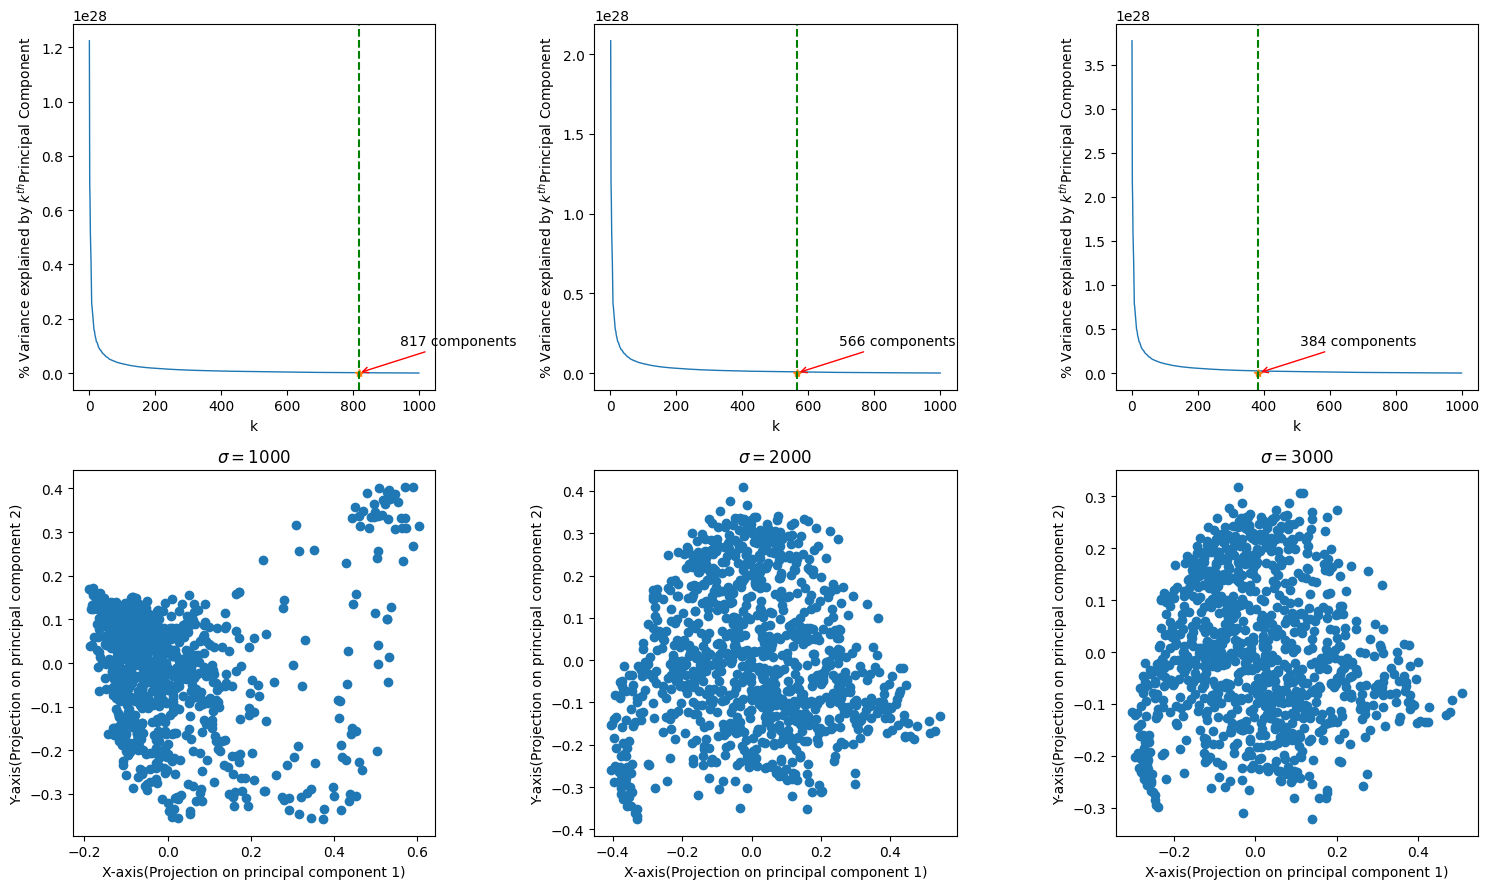

In [137]:
import math
sigmas=[1000,2000,3000]
fig,axs=plt.subplots(2,3,figsize=(15,9))
b=0
for sigma in sigmas :  
    
    R_Kernel_matrix=np.zeros((N,N))
    for i in range(N) :
        for j in range(N):
            R_Kernel_matrix[i][j]=math.exp(-1*(np.dot((X[:,i]-X[:,j]).T,(X[:,i]-X[:,j])))/(2*(sigma*sigma)))

    sum_of_elements_row=np.sum(R_Kernel_matrix,axis=1)/N
    sum_of_elements_row=sum_of_elements_row.reshape(-1,1)
    sum_of_elements_col=np.sum(R_Kernel_matrix,axis=0)/N
    totalsum_of_elements =np.sum(R_Kernel_matrix)/((N)*(N))
    Centered_R_Kernel_matrix=np.zeros((N,N))
    Centered_R_Kernel_matrix=R_Kernel_matrix -sum_of_elements_col-sum_of_elements_row+totalsum_of_elements

    R_Kernel_eigenvalues,R_Kernel_eigenvectors=np.linalg.eigh(Centered_R_Kernel_matrix)
    R_Kernel_eigenvalues=R_Kernel_eigenvalues[::-1]
    R_Kernel_eigenvectors=R_Kernel_eigenvectors[:,::-1]
    eigenvalues_totalsum =0 #intialised to zero
    K=0                     
    eigen_sum=[0   for i in range(N)]  # creates list of length 784 each element is 0.
    for i in range (len(R_Kernel_eigenvalues) ):
        eigenvalues_totalsum+=R_Kernel_eigenvalues[i]
                                                 
    for j in range (len(R_Kernel_eigenvalues) ):
        for k in range(j) :
            eigen_sum[j]+=R_Kernel_eigenvalues[k]
        eigen_sum[j] = eigen_sum[j]*100/ (eigenvalues_totalsum)
    
    for i in range(len(R_Kernel_eigenvalues)) :
        if eigen_sum[i]>=95 :
            K=i
            break
    print(eigen_sum[2])
    after_R_kernel_data=np.zeros((X.shape[1],2))
    for i in range(X.shape[1]) :
        after_R_kernel_data[i,0]=np.dot(Centered_R_Kernel_matrix[i].T,(R_Kernel_eigenvectors[:,0])/((R_Kernel_eigenvalues[0])**0.5))
        after_R_kernel_data[i,1]=np.dot(Centered_R_Kernel_matrix[i].T,(R_Kernel_eigenvectors[:,1])/((R_Kernel_eigenvalues[1])**0.5))
    axs[int(b/3),int(b%3)].plot(x,100*P_Kernel_eigenvalues/eigenvalues_totalsum,linewidth=1)
    axs[int(b/3),int(b%3)].plot(K+1,P_Kernel_eigenvalues[K]/eigenvalues_totalsum,marker='*',label=f"{K} components")
    #axs[int(b/3),int(b%3)].text(K+1,P_Kernel_eigenvalues[K]/eigenvalues_totalsum,f"{K} components",fontsize=12,ha='right')
    axs[int(b/3), int(b%3)].annotate(f"{K+1} components", xy=(K + 1, P_Kernel_eigenvalues[K]/eigenvalues_totalsum),
                                 xytext=(30, 20),textcoords='offset points', arrowprops=dict(arrowstyle='->',color='red'))

    axs[int(b/3),int(b%3)].axvline(x=K+1,color="g",linestyle='--')
    axs[int(b/3),int(b%3)].set_xlabel("k")
    axs[int(b/3),int(b%3)].set_ylabel(r"% Variance explained by $k^{th}$Principal Component")
    axs[int(b/3)+1,int(b%3)].scatter(after_R_kernel_data[:,0],after_R_kernel_data[:,1])
    axs[int(b/3)+1,int(b%3)].set_xlabel("X-axis(Projection on principal component 1)")
    axs[int(b/3)+1,int(b%3)].set_ylabel("Y-axis(Projection on principal component 2)")
    axs[int(b/3)+1,int(b%3)].set_title("$\\sigma = $"+str(sigma))
    b+=1
plt.tight_layout()
plt.show()    
    